<a href="https://www.kaggle.com/code/mustafakapici/advertising-classification?scriptVersionId=181537370" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

 dataset link : https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad

In [2]:
path = '/kaggle/input/advertisement-click-on-ad/advertising.csv'

In [3]:
ads = pd.read_csv(path)
df = ads.copy()
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Daily Time Spent on Site,1000.0,65.0002,32.6,51.36,68.215,78.5475,91.43,15.853615
Age,1000.0,36.009,19.0,29.0,35.0,42.0,61.0,8.785562
Area Income,1000.0,55000.00008,13996.5,47031.8025,57012.3,65470.635,79484.8,13414.634022
Daily Internet Usage,1000.0,180.0001,104.78,138.83,183.13,218.7925,269.96,43.902339
Male,1000.0,0.481,0.0,0.0,0.0,1.0,1.0,0.499889
Timestamp,1000,2016-04-10 10:34:06.636000256,2016-01-01 02:52:10,2016-02-18 02:55:42,2016-04-07 17:27:29.500000,2016-05-31 03:18:14,2016-07-24 00:22:16,NaN
Clicked on Ad,1000.0,0.5,0.0,0.0,0.5,1.0,1.0,0.50025


In [7]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [8]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

<Axes: xlabel='Clicked on Ad', ylabel='count'>

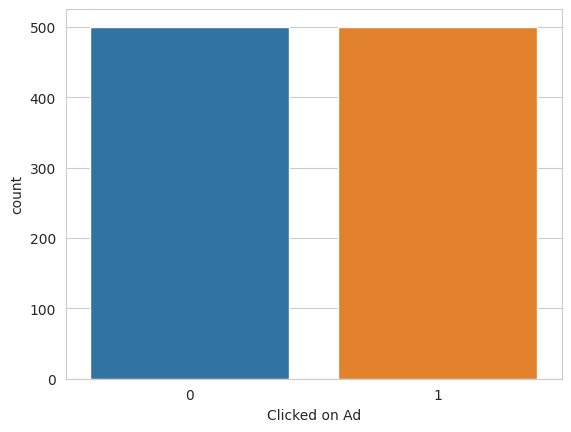

In [9]:
sns.countplot(x='Clicked on Ad', data=df)

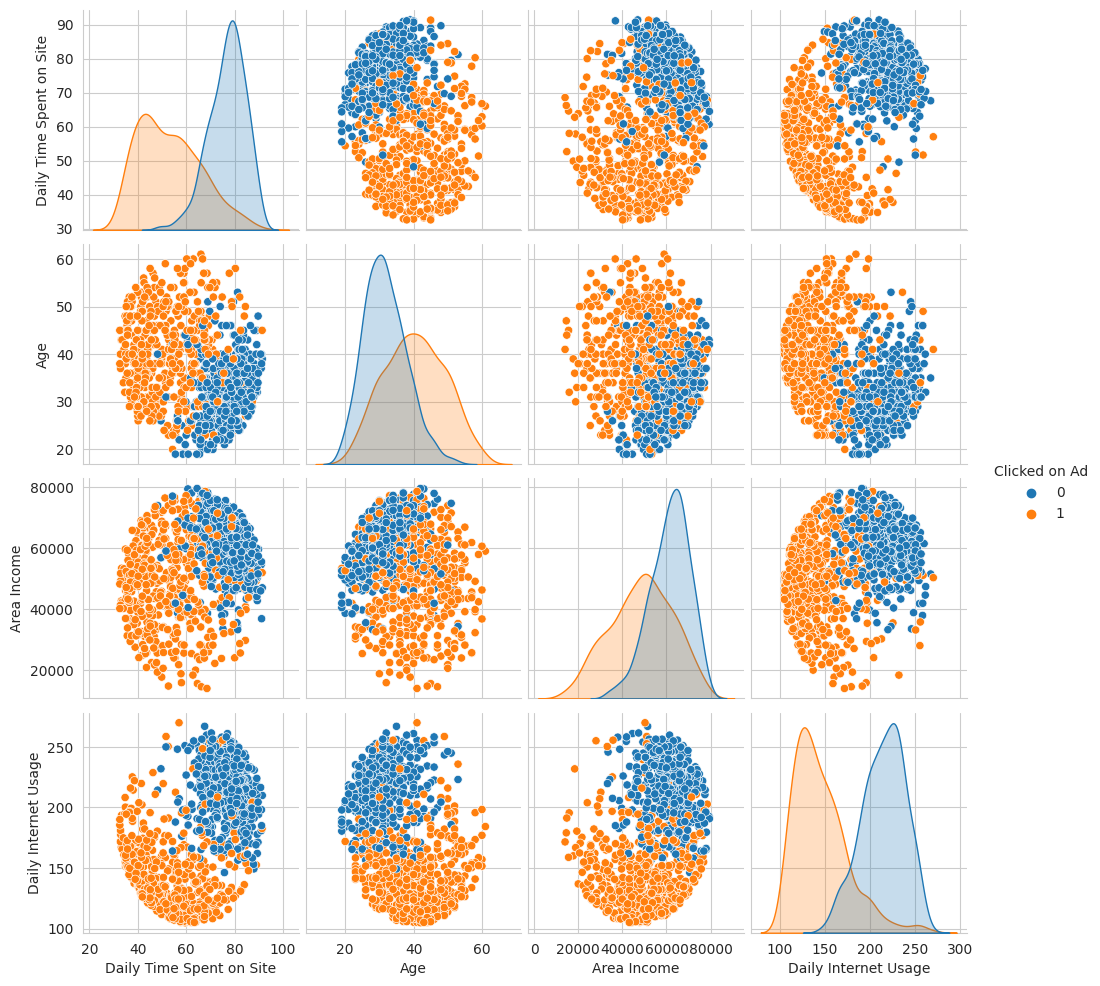

In [10]:
sns.pairplot(data = df.drop("Male",axis=1), hue='Clicked on Ad')

<Axes: xlabel='Daily Time Spent on Site', ylabel='Age'>

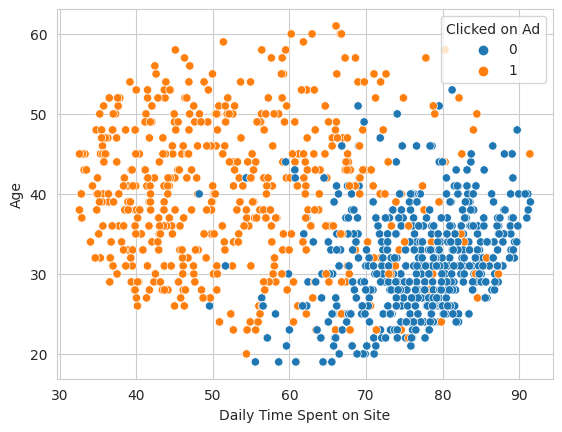

In [11]:
sns.scatterplot(x='Daily Time Spent on Site', y='Age', hue='Clicked on Ad', data=df)

In [12]:
numerical_cols= ['Daily Time Spent on Site','Daily Internet Usage','Area Income','Age']


In [13]:
def boxPlot(df):
    for i,col in enumerate(numerical_cols,start=1):
        plt.subplot(2,2,i)
        sns.boxplot(x = 'Clicked on Ad', y = col, data = df, palette = 'coolwarm_r')
    plt.subplots_adjust(left = 0.1,right=0.9,wspace=0.4,hspace=0.4)
 
 
def distPlot(df):
    for i,col in enumerate(numerical_cols,start=1):
        plt.subplot(2,2,i)
        sns.distplot(df[col],bins=20)   
    plt.subplots_adjust(left = 0.1,right=0.9,wspace=0.4,hspace=0.4)
    
def linePlot(df):
    df['Months'] = df['Timestamp'].apply(lambda x: x.month)
    df['Days'] = df['Timestamp'].apply(lambda x: x.day)
    df['Hours'] = df['Timestamp'].apply(lambda x: x.hour)

    date_columns = ['Months','Hours','Days']

    for i,col in enumerate(date_columns,start=1):
        plt.subplot(2,2,i)
        sns.lineplot(df.groupby(col)['Clicked on Ad'].sum())
        plt.xlabel(col,size = 14)
        plt.ylabel('Clicked on Ad',size = 14)
        plt.xticks(size = 12)
        plt.yticks(size = 12)

    plt.suptitle('Sum of Clicked on Ad',size = 16)
    plt.subplots_adjust(left = 0.1,right=0.9,wspace=0.4,hspace=0.4)
    
def cal(df):
    print('Clicked on Ad Rates'.center(50,'_'))

    for col in numerical_cols:
        print('\n')
        print(f'{col} <= mean - std: {round(df[df[col] <= df[col].mean() - df[col].std()]["Clicked on Ad"].mean()*100,2)}%')
        print(f'{col} <= mean: {round(df[df[col] <= df[col].mean()]["Clicked on Ad"].mean()*100,2)}%')
        print(f'{col} >= mean: {round(df[df[col] >= df[col].mean()]["Clicked on Ad"].mean()*100,2)}%')
        print(f'{col} >= mean + std: {round(df[df[col] >= df[col].mean() + df[col].std()]["Clicked on Ad"].mean()*100,2)}%')


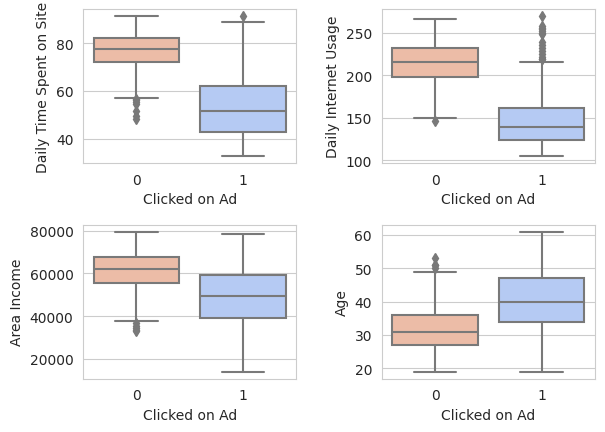

In [14]:
boxPlot(df)

In [15]:
cal(df)

_______________Clicked on Ad Rates________________


Daily Time Spent on Site <= mean - std: 99.54%
Daily Time Spent on Site <= mean: 93.06%
Daily Time Spent on Site >= mean: 17.25%
Daily Time Spent on Site >= mean + std: 7.47%


Daily Internet Usage <= mean - std: 100.0%
Daily Internet Usage <= mean: 90.78%
Daily Internet Usage >= mean: 11.13%
Daily Internet Usage >= mean + std: 5.77%


Area Income <= mean - std: 92.73%
Area Income <= mean: 74.15%
Area Income >= mean: 30.95%
Area Income >= mean + std: 27.21%


Age <= mean - std: 21.43%
Age <= mean: 30.94%
Age >= mean: 75.47%
Age >= mean + std: 90.91%


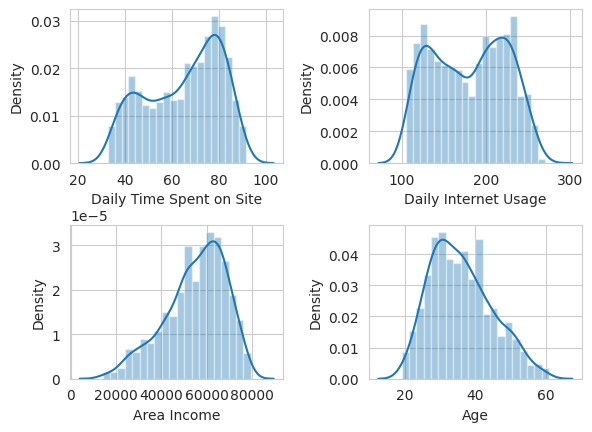

In [16]:
distPlot(df)

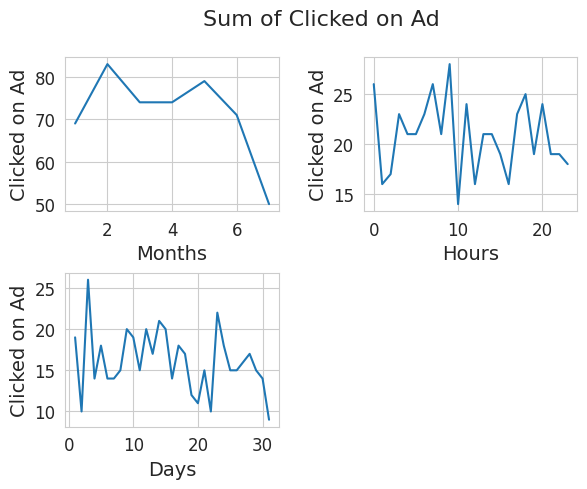

In [17]:
linePlot(df)

In [18]:
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [19]:
import openpyxl
pv_timestamp = df.pivot_table(values='Clicked on Ad', index=['Days','Hours'],columns='Months', aggfunc='sum').fillna(0)
pv_timestamp.to_excel('timestamp.xlsx')
pv_timestamp

Months        1    2    3    4    5    6    7
Days Hours                                   
1    0      0.0  1.0  0.0  0.0  1.0  0.0  0.0
     1      0.0  0.0  0.0  1.0  0.0  0.0  1.0
     2      0.0  0.0  0.0  0.0  0.0  0.0  0.0
     3      0.0  0.0  0.0  0.0  0.0  2.0  0.0
     4      0.0  0.0  0.0  0.0  0.0  0.0  0.0
...         ...  ...  ...  ...  ...  ...  ...
31   13     0.0  0.0  0.0  0.0  0.0  0.0  0.0
     17     0.0  0.0  0.0  0.0  1.0  0.0  0.0
     20     0.0  0.0  0.0  0.0  0.0  0.0  0.0
     21     0.0  0.0  0.0  0.0  1.0  0.0  0.0
     23     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[554 rows x 7 columns]

# Data Preprocessing

### - Create Independent and Dependent Variables

In [20]:
X = df.drop(['Clicked on Ad','Ad Topic Line','City','Country','Timestamp', 'Months','Days', 'Hours'], axis=1) # Drop Features
y = df['Clicked on Ad'].values # Target Variable

In [21]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score , f1_score
import pandas as pd

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier


# Model Building

In [26]:
def random_forest():
    classifier = RandomForestClassifier(criterion='entropy',n_estimators = 100,random_state=0).fit(X_train,y_train)
    return classifier

In [27]:
def decision_tree():
    classifier = DecisionTreeClassifier(
        criterion='gini',
        max_depth = 4,
        min_samples_split = 4,
        random_state=0
    ).fit(X_train,y_train)
    return classifier

In [28]:
def knn():
    classifier = KNeighborsClassifier(n_neighbors=9).fit(X_train,y_train)
    return classifier

In [29]:
def naive_bayes():
    classifier = GaussianNB().fit(X_train,y_train)
    return classifier

In [30]:
def mlp():
    classifier = MLPClassifier(
        early_stopping=True,
        batch_size=32,
        random_state=0
    ).fit(X_train,y_train)

    return classifier

In [31]:
def logistic_reg():
    classifier = LogisticRegression(random_state=0,C=1).fit(X_train,y_train)
    return classifier

In [32]:
def xgboost():
    classifier = XGBClassifier(learning_rate =  0.1,
                               max_depth = 4,
                               n_estimators = 100,
                               subsample = 0.8
                               ).fit(X_train,y_train)
    return classifier

In [33]:
classifiers = {'Random Forest':random_forest(),'Decision Tree':decision_tree(),'KNN':knn(),
               'Naive Bayes':naive_bayes(),'MLP':mlp(),'Logistic Regression':logistic_reg(),
               'XGBoost':xgboost()}

In [34]:
parameters = {
    'Random Forest': {"max_depth": [None,5,8,10],"n_estimators": [100,500,1000], 'criterion':['entropy','gini']},
    'Decision Tree': {'criterion': ['entropy','gini'], "max_depth": range(1,10), "min_samples_split" : list(range(2,50))},
    'KNN': {'n_neighbors': np.arange(1,20,step = 2)},
    'Logistic Regression': {'C':[1.0,2.0,3.0,4.0,5.0]},
    'XGBoost': {'n_estimators': [100, 500, 1000],'subsample': [0.6, 0.8, 1.0],'max_depth': [4, 5, 6],'learning_rate': [0.1, 0.01, 0.02]},
    'MLP': {'batch_size': [16,32,64],'early_stopping': [True,False]},
    'Naive Bayes': {}
    
    
    }

In [35]:
def grid_search(classifiers,parameters):
    best_params = {}
    for key in classifiers.keys():
        
        ## Add parameters to grid search
        grid_search = GridSearchCV(
            estimator = classifiers[key],
            param_grid = parameters[key],
            scoring = 'accuracy',
            cv = 10,
            n_jobs = -1,
            return_train_score = True)
        
        ## Fit the model
        grid_search.fit(X_train,y_train)
        
        ## Get the best parameters and accuracy
        best_params[key] = grid_search.best_params_
        print(f"{key} best parameters: {grid_search.best_params_}")
        print(f"{key} best accuracy: {grid_search.best_score_}")
        
    return best_params


In [36]:
print("This process may take a while, please wait...")


for key in classifiers.keys():
    print(f"Grid Search for {key} is started")
    grid_search(classifiers,parameters)
    print(f"Grid Search for {key} is completed")
    print("\n")

This process may take a while, please wait...
Grid Search for Random Forest is started
Random Forest best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 500}
Random Forest best accuracy: 0.9628571428571429
Decision Tree best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Decision Tree best accuracy: 0.9585714285714285
KNN best parameters: {'n_neighbors': 17}
KNN best accuracy: 0.9685714285714286
Naive Bayes best parameters: {}
Naive Bayes best accuracy: 0.9671428571428571


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

MLP best parameters: {'batch_size': 16, 'early_stopping': True}
MLP best accuracy: 0.9657142857142859
Logistic Regression best parameters: {'C': 1.0}
Logistic Regression best accuracy: 0.9700000000000001
XGBoost best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.8}
XGBoost best accuracy: 0.96
Grid Search for Random Forest is completed


Grid Search for Decision Tree is started
Random Forest best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 500}
Random Forest best accuracy: 0.9628571428571429
Decision Tree best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Decision Tree best accuracy: 0.9585714285714285
KNN best parameters: {'n_neighbors': 17}
KNN best accuracy: 0.9685714285714286
Naive Bayes best parameters: {}
Naive Bayes best accuracy: 0.9671428571428571


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

MLP best parameters: {'batch_size': 16, 'early_stopping': True}
MLP best accuracy: 0.9657142857142859
Logistic Regression best parameters: {'C': 1.0}
Logistic Regression best accuracy: 0.9700000000000001
XGBoost best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.8}
XGBoost best accuracy: 0.96
Grid Search for Decision Tree is completed


Grid Search for KNN is started
Random Forest best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 500}
Random Forest best accuracy: 0.9628571428571429
Decision Tree best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Decision Tree best accuracy: 0.9585714285714285
KNN best parameters: {'n_neighbors': 17}
KNN best accuracy: 0.9685714285714286
Naive Bayes best parameters: {}
Naive Bayes best accuracy: 0.9671428571428571


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

MLP best parameters: {'batch_size': 16, 'early_stopping': True}
MLP best accuracy: 0.9657142857142859
Logistic Regression best parameters: {'C': 1.0}
Logistic Regression best accuracy: 0.9700000000000001
XGBoost best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.8}
XGBoost best accuracy: 0.96
Grid Search for KNN is completed


Grid Search for Naive Bayes is started
Random Forest best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 500}
Random Forest best accuracy: 0.9628571428571429
Decision Tree best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Decision Tree best accuracy: 0.9585714285714285
KNN best parameters: {'n_neighbors': 17}
KNN best accuracy: 0.9685714285714286
Naive Bayes best parameters: {}
Naive Bayes best accuracy: 0.9671428571428571


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

MLP best parameters: {'batch_size': 16, 'early_stopping': True}
MLP best accuracy: 0.9657142857142859
Logistic Regression best parameters: {'C': 1.0}
Logistic Regression best accuracy: 0.9700000000000001
XGBoost best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.8}
XGBoost best accuracy: 0.96
Grid Search for Naive Bayes is completed


Grid Search for MLP is started
Random Forest best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 500}
Random Forest best accuracy: 0.9628571428571429
Decision Tree best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Decision Tree best accuracy: 0.9585714285714285
KNN best parameters: {'n_neighbors': 17}
KNN best accuracy: 0.9685714285714286
Naive Bayes best parameters: {}
Naive Bayes best accuracy: 0.9671428571428571


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

MLP best parameters: {'batch_size': 16, 'early_stopping': True}
MLP best accuracy: 0.9657142857142859
Logistic Regression best parameters: {'C': 1.0}
Logistic Regression best accuracy: 0.9700000000000001
XGBoost best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.8}
XGBoost best accuracy: 0.96
Grid Search for MLP is completed


Grid Search for Logistic Regression is started
Random Forest best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 500}
Random Forest best accuracy: 0.9628571428571429
Decision Tree best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Decision Tree best accuracy: 0.9585714285714285
KNN best parameters: {'n_neighbors': 17}
KNN best accuracy: 0.9685714285714286
Naive Bayes best parameters: {}
Naive Bayes best accuracy: 0.9671428571428571


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

MLP best parameters: {'batch_size': 16, 'early_stopping': True}
MLP best accuracy: 0.9657142857142859
Logistic Regression best parameters: {'C': 1.0}
Logistic Regression best accuracy: 0.9700000000000001
XGBoost best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.8}
XGBoost best accuracy: 0.96
Grid Search for Logistic Regression is completed


Grid Search for XGBoost is started
Random Forest best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 500}
Random Forest best accuracy: 0.9628571428571429
Decision Tree best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Decision Tree best accuracy: 0.9585714285714285
KNN best parameters: {'n_neighbors': 17}
KNN best accuracy: 0.9685714285714286
Naive Bayes best parameters: {}
Naive Bayes best accuracy: 0.9671428571428571


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

MLP best parameters: {'batch_size': 16, 'early_stopping': True}
MLP best accuracy: 0.9657142857142859
Logistic Regression best parameters: {'C': 1.0}
Logistic Regression best accuracy: 0.9700000000000001
XGBoost best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.8}
XGBoost best accuracy: 0.96
Grid Search for XGBoost is completed




# Model Evaluation

In [37]:
def evaluate(classifiers):
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision',
                                    'Recall', 'F1 Score', 'CVS (Mean)', 'CVS (STD)%',
                                    'TP', 'TN', 'FP', 'FN'])
    for key in classifiers.keys():
        y_pred = classifiers[key].predict(X_test)
        cv_scores = cross_val_score(classifiers[key], X_train, y_train, cv=10)
        cm = confusion_matrix(y_test, y_pred)
        
        result = pd.DataFrame({
            'Model': [key],
            'Accuracy': [accuracy_score(y_test, y_pred)],
            'Precision': [precision_score(y_test, y_pred)],
            'Recall': [recall_score(y_test, y_pred)],
            'F1 Score': [f1_score(y_test, y_pred)],
            'CVS (Mean)': [cv_scores.mean()],
            'CVS (STD)%': [cv_scores.std() * 100],
            'TP': [cm[0][0]],
            'TN': [cm[1][1]],
            'FP': [cm[0][1]],
            'FN': [cm[1][0]]
        })
        
        results = pd.concat([results, result], ignore_index=True)
        
    return results


In [38]:

results = evaluate(classifiers)
results


,Model,Accuracy,Precision,Recall,F1 Score,CVS (Mean),CVS (STD)%,TP,TN,FP,FN
0,Random Forest,0.956667,0.960784,0.954545,0.957655,0.958571,2.744196,140,147,6,7
1,Decision Tree,0.940000,0.959459,0.922078,0.940397,0.954286,2.770103,140,142,6,12
2,KNN,0.946667,0.979167,0.915584,0.946309,0.968571,2.982945,143,141,3,13
3,Naive Bayes,0.960000,0.961039,0.961039,0.961039,0.967143,2.217739,140,148,6,6
4,MLP,0.930000,0.985401,0.876623,0.927835,0.964286,2.575394,144,135,2,19
5,Logistic Regression,0.970000,0.980132,0.961039,0.970492,0.970000,1.963961,143,148,3,6
6,XGBoost,0.953333,0.954545,0.954545,0.954545,0.954286,3.050594,139,147,7,7


# Model Comparison

In [39]:
## classification report

from sklearn.metrics import classification_report
for key in classifiers.keys():
    print(f"{key} classification report: \n{classification_report(y_test,classifiers[key].predict(X_test))}")
    

Random Forest classification report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       146
           1       0.96      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Decision Tree classification report: 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       146
           1       0.96      0.92      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

KNN classification report: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       146
           1       0.98      0.92      0.95       154

    accuracy                           0.95       300
   macro avg       0.95 

# Prediction

In [40]:
# df.describe().transpose()

In [41]:
# predictions = [[enter_values_of_each_column]]
# predictions = sc.transform(predictions)

# print(classifiers['enter_algorithm_name'].predict(predictions)[0])

# Save Model

In [42]:
# import pickle
# try:
#     with open('your_file_name', 'wb') as file:  
#         pickle.dump(classifiers['enter_algorithm_name'], file)
#     print('Model Saved')
# except:
#     print('Invalid Algorithm Name!')

# Load Model

In [43]:
# try:
#     with open('your_file_name', 'rb') as file:  
#         my_model = pickle.load(file)
#     print('Model Loaded')
# except:
#     print('Invalid Filename!')